<a href="https://colab.research.google.com/github/rameenhamad/Elvovo_ML_Internship_Tasks/blob/main/1_Student_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [38]:
data = pd.read_csv(r"/content/drive/MyDrive/Elvovo_Tasks/1.Student_Score_Prediction/StudentPerformanceFactors.csv")
data.head(3)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74


In [39]:
data.info()
data.drop_duplicates()
data.describe()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [40]:
data['Teacher_Quality'].unique()

array(['Medium', 'High', 'Low', nan], dtype=object)

In [41]:
# # Scatter plot (feature vs target)
# axes[i, 2].scatter(X_train[col], y_train, alpha=0.6)
# axes[i, 2].set_xlabel(col)
# axes[i, 2].set_ylabel("Target")
# axes[i, 2].set_title(f"Scatter Plot of {col} vs Target")

filling missing value

In [42]:
columns_nan = ['Teacher_Quality','Parental_Education_Level', 'Distance_from_Home']
for col in columns_nan:
  data[col] = data[col].fillna(data[col].mode()[0])

#Feature engineering

Encoding

In [43]:
from sklearn.preprocessing import OrdinalEncoder

lmh = ['Low', 'Medium', 'High']
mappings = {
    'Parental_Involvement': lmh,
    'Access_to_Resources': lmh,
    'Motivation_Level': lmh,
    'Family_Income': lmh,
    'Teacher_Quality': lmh,
    'Peer_Influence': ['Negative', 'Neutral', 'Positive'],
    'Parental_Education_Level': ['High School', 'College', 'Postgraduate'],
    'Distance_from_Home': ['Near', 'Moderate', 'Far']
}

for col, cats in mappings.items():
    oe = OrdinalEncoder(categories=[cats])
    data[col] = oe.fit_transform(data[[col]])

In [44]:
from sklearn.preprocessing import OneHotEncoder

ohe_columns = ['Extracurricular_Activities', 'Internet_Access', 'School_Type', 'Learning_Disabilities', 'Gender']

ohe = OneHotEncoder(drop="first", sparse_output=False)
for col in ohe_columns:
    data[col] = ohe.fit_transform(data[[col]])

In [45]:
#better perform
X = data.drop(['Exam_Score'], axis=1)
Y = data['Exam_Score']

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=41)
X_train

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
4602,30,63,2.0,0.0,0.0,5,97,2.0,1.0,2,0.0,2.0,1.0,2.0,2,1.0,1.0,1.0,0.0
233,16,94,2.0,2.0,1.0,9,76,1.0,1.0,0,0.0,2.0,1.0,1.0,2,0.0,0.0,0.0,1.0
4398,26,78,2.0,2.0,1.0,8,73,1.0,0.0,2,0.0,1.0,0.0,2.0,4,0.0,1.0,0.0,0.0
3884,20,73,1.0,0.0,1.0,6,65,1.0,1.0,2,2.0,2.0,0.0,2.0,2,0.0,1.0,0.0,1.0
2741,23,72,1.0,1.0,1.0,7,78,1.0,1.0,1,0.0,1.0,0.0,1.0,3,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5200,18,69,1.0,0.0,1.0,5,73,0.0,1.0,1,0.0,2.0,1.0,2.0,4,0.0,2.0,1.0,1.0
4066,21,69,1.0,0.0,1.0,7,85,1.0,1.0,2,1.0,1.0,0.0,2.0,0,0.0,2.0,0.0,1.0
3980,28,62,0.0,2.0,0.0,8,85,1.0,1.0,2,0.0,2.0,1.0,2.0,3,0.0,0.0,1.0,0.0
931,31,95,2.0,1.0,1.0,5,87,1.0,1.0,2,0.0,1.0,1.0,1.0,3,0.0,2.0,1.0,1.0


Target column data distribution

Text(0.5, 1.0, 'exam scores')

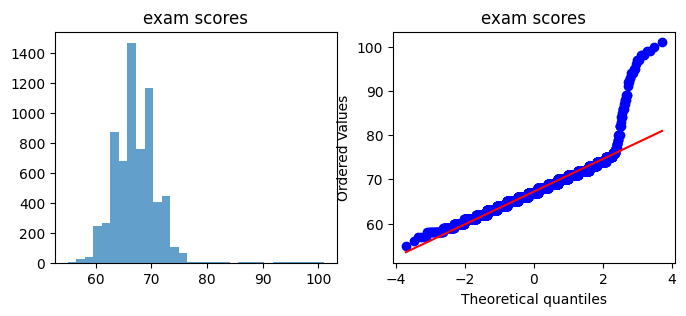

In [47]:
import scipy.stats as st
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].hist(Y, bins=30, alpha=0.7)
axes[0].set_title(f"exam scores")

# QQ plot
st.probplot(Y, plot=axes[1])
axes[1].set_title(f"exam scores")

In [48]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
y_train_trans = transformer.fit_transform(y_train)
y_test_trans = transformer.transform(y_test)

Text(0.5, 1.0, 'exam scores')

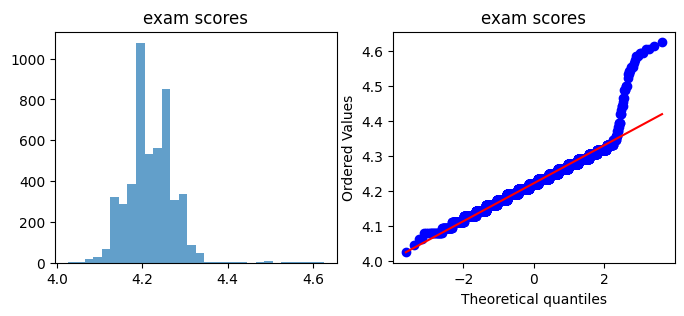

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].hist(y_train_trans, bins=30, alpha=0.7)
axes[0].set_title(f"exam scores")

# QQ plot
st.probplot(y_train_trans, plot=axes[1])
axes[1].set_title(f"exam scores")

scaling

In [50]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model fitting linear regression

In [51]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
model_lr = lr.fit(X_train_scaled, y_train_trans)
y_pred = model_lr.predict(X_test_scaled)

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

mse = mean_squared_error(y_test_trans, y_pred)
rmse = root_mean_squared_error(y_test_trans, y_pred)
mae = mean_absolute_error(y_test_trans, y_pred)
r2 = r2_score(y_test_trans, y_pred)

print("Linear MSE:", mse)
print("Linear RMSE:", rmse)
print("Linear MAE:", mae)
print("Linear R² Score:", r2)

Linear MSE: 0.0004326775507906401
Linear RMSE: 0.02080090264365083
Linear MAE: 0.006044592225293993
Linear R² Score: 0.8366062321973919


Polynomial Regression

In [53]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, interaction_only=True)
X_train_pf = pf.fit_transform(X_train_scaled)
X_test_pf = pf.transform(X_test_scaled)

In [54]:
from sklearn.linear_model import Ridge

r = Ridge()
model_r = r.fit(X_train_pf, y_train_trans)
y_pred_r = model_r.predict(X_test_pf)

print("Ridge MSE:", mean_squared_error(y_test_trans, y_pred_r))
print("Ridge RMSE:", root_mean_squared_error(y_test_trans, y_pred_r))
print("Ridge MAE:", mean_absolute_error(y_test_trans, y_pred_r))
print("Ridge R² Score:", r2_score(y_test_trans, y_pred_r))

Ridge MSE: 0.0004723839034467831
Ridge RMSE: 0.021734394480794332
Ridge MAE: 0.0075685395895446015
Ridge R² Score: 0.8216117621715469


In [55]:
from sklearn.linear_model import Lasso

ls = Lasso()
model_ls = ls.fit(X_train_pf, y_train_trans)
y_pred_ls = model_ls.predict(X_test_pf)

print("Lasso MSE:", mean_squared_error(y_test_trans, y_pred_ls))
print("Lasso RMSE:", root_mean_squared_error(y_test_trans, y_pred_ls))
print("Lasso MAE:", mean_absolute_error(y_test_trans, y_pred_ls))
print("Lasso R² Score:", r2_score(y_test_trans, y_pred_ls))

Lasso MSE: 0.0026480732263931103
Lasso RMSE: 0.051459432822302954
Lasso MAE: 0.03958488335871228
Lasso R² Score: -2.567932949393281e-06


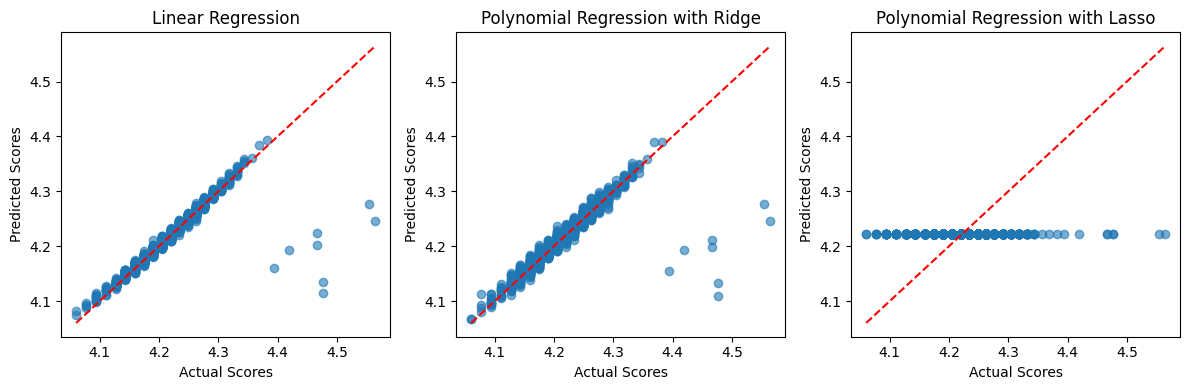

In [56]:
fig, axs = plt.subplots(1, 3, figsize=(12,4))

axs[0].scatter(y_test_trans, y_pred, alpha=0.6)
axs[0].set_xlabel("Actual Scores")
axs[0].set_ylabel("Predicted Scores")
axs[0].set_title("Linear Regression")
axs[0].plot([y_test_trans.min(), y_test_trans.max()], [y_test_trans.min(), y_test_trans.max()], 'r--')

axs[1].scatter(y_test_trans, y_pred_r, alpha=0.6)
axs[1].set_xlabel("Actual Scores")
axs[1].set_ylabel("Predicted Scores")
axs[1].set_title("Polynomial Regression with Ridge")
axs[1].plot([y_test_trans.min(), y_test_trans.max()], [y_test_trans.min(), y_test_trans.max()], 'r--')

axs[2].scatter(y_test_trans, y_pred_ls, alpha=0.6)
axs[2].set_xlabel("Actual Scores")
axs[2].set_ylabel("Predicted Scores")
axs[2].set_title("Polynomial Regression with Lasso")
axs[2].plot([y_test_trans.min(), y_test_trans.max()], [y_test_trans.min(), y_test_trans.max()], 'r--')

plt.tight_layout()
plt.show()

##Observations
- **Linear Regression** is the clear winner on this dataset (lowest error, highest R²).
- **Ridge Regression** is close but not better → regularization wasn’t needed much.
- **Lasso Regression** fails here, likely due to over-penalization (underfitting).